# Complexité des algorithmes (16 juin 2019)
## DIU 2019, Université de Bordeaux
### Cedric Chauve, cedric.chauve@u-bordeaux.fr

## Préambule.

Ce calepin Jupyter est le squelette du cours du Mardi 25 juin portant sur la complexité des algorithmes. Il contient la plus grande partie du matériel présenté durant les trois heures du cours, introduit de manière relativement informelle et en utilisant plusieurs exemples relativement simple. Un traitement plus complet peut se trouver dans tout texte d'introduction aux algorithmes, par exemple <a href="https://www.lri.fr/~mcg/PDF/FroidevauxGaudelSoria.pdf">Types de données et algorithmes</a> par Froidevaux, Gaudel et Soria ou les transparents du cours <a href="http://www.montefiore.ulg.ac.be/~geurts/Cours/sda/2011/sda-complet-2011-2012.pdf">Structures de données et algorithmes</a> de Geurts. Le but de ces trois heures de cours est de fournir les premières bases de l'analyse de la complexité des algorithmes.

#### Remarques.
Tous les algorithmes dont on analyse la complexité dans ce document sont implementés dans des cellules de type "code" permettant de les exécuter si nécessaire.

Pour tirer avantage du format offert par les calepins Jupyter, chaque section de ce document se termine par une cellule vide "Notes" permettant de prendre des notes en direct durant le cours.

## 1. Contexte.

On dispose d'un algorithme $A$ effectuant un traitement de données $D$ (l'entrée de l'algorithme). On dispose d'une fonction $s$ mesurant la taille de $D$, notée en général $n$ : $n=s(D)$.

**Exemple 1.**
- $D$ = tableau de $n$ entiers pris (avec répétition possible) dans $\{1,...,n\}$. $s(D) = n$.
- $A$ = algorithme retournant le plus petit élément et le plus grand élément de D.

**Exemple 2.**
- $D$ = entier positif $n$. $s(D) = n$
- $A$ = algorithme calculant la somme $n+(n-1)+\cdots+2+1$.

On définit la notion d'espace des données comme l'ensemble des données $D$ possibles que l'algorithme $A$ pourrait avoir à analyser. On note $E_n$ l'espace de toutes les données possibles de taille $n$.

**Exemple 1.** $E_n$ est l'ensemble de tous les tableaux de $n$ entiers naturels non-négatifs encodable sur $64$ bits : $|E_n|$ (la cardinalité de $E_n$) est $(2^{64})^n$.

**Exemple 2.** $E_n = \{n\}$, $|E_n|=1$.

**But.** On veut pouvoir *estimer* le temps de calcul nécessaire à $A$ pour traiter une donnée $D$ de $E_n$, que l'on appelle la *complexité en temps* de $A$, dans le but de pouvoir prédire le comportement général de $A$ notamment quand $n$ devient très grand (comportement *asymptotique*).

**Motivations (exemples).**
- On a deux algorithmes, $A_1$ et $A_2$, calculant le même résultat mais en utilisant des méthodes différentes, et on sait que l'on va devoir en choisir un pour traiter souvent des données de grandes tailles. On veut choisir celui de complexité minimale.
- On veut implémenter l'algorithme $A$ sur un système partagé (cluster) sur lequel on doit spécifier le temps alloué à un processus. On va utiliser notre connaissance de la complexité en temps de $A$ pour effectuer une requête de temps d'accès au système réaliste si on veut s'assurer que le calcul se termine.

### Notes.

## 2. Mesure du temps d'exécution d'un algorithme.

Le temps effectif pris par une implémentation d'un algorithme dépend fortement du système sur lequel il tourne : architecture matérielle,
système d'exploitation, language de programmation. La mesure de la complexité d'un algorithme se veut indépendante de ces détails d'implémentation (même si en pratique ils sont fondamentaux). Elle se mesure à un plus haut niveau d'abstraction, et se définit comme le *nombre d'opérations élémentaires effectuée par l'algorithme*. Les opérations élémentaires couramment prises en compte sont :
- les opérations arithmétiques,
- la lecture ou l'affectation d'une variable (incluant l'affectation d'un compteur de boucle) ou d'un élément d'un tableau (ou liste ou dictionaire),
- un test test booléen.

On note $c(A,D)$ la complexité en temps de l'algorithme $A$ appliqué à l'entrée $D$, i.e. le nombre d'opérations élémentaires effectuées par $A$ pour traiter $D$.

**Exemple 1.** Recherche du min et du max d'un tableau d'entiers non-négatifs.

In [5]:
def trouve_min_max(D):  
    n = length(D)  
    min_courant = D[0]  
    max_courant = D[0]
    for i in range(n):  
        if D[i]<min_courant:  
           min_courant = D[i]  
        if D[i]>max_courant:  
           max_courant = D[i]  
    return((min_courant,max_courant))  

Si $A$= trouve_min_max et $D=[5,99,6,75,2,8,35]$, $A(D)$ effectue 6 affectations 14 tests booléens, et 7 affectations du compteur $i$, donc 27 opérations élémentaires: $c(A,D) = 27$.

**Exemple 2.** Calcul de la somme des $n$ premiers entiers naturels.
On peut penser à deux algorithmes pour cette tâches. Le premier boucle sur les entiers naturels augmentant la somme à chaque itération, alors que le second implémente la forme close $n(n+1)/2$.

In [2]:
def somme_entiers_naturels_v1(n):
    somme = 0
    for i in range(1,n+1):
        somme += i
    return(somme)

def somme_entiers_naturels_v2(n):
    somme = n*(n+1)/2
    return(somme)

L'algorithme *somme_entiers_naturels_v1* (appelons-le algorithme $A_1$) effectue $n+1$ affectations, $n$ opérations arithmétiques et affecte le compteur de boucle $i$ $n$ times: $c(A_1,n)=3n+1$.  

L'algorithme *somme_entiers_naturels_v2* (appelons-le algorithme $A_2$) effectue 3 opérations arithmétiques et une affectation, donc $c(A_2,n)=4$.

Il est clair que l'algorithme *somme_entiers_naturels_v2* a une meilleure complexité en temps dès que $n>1$. On verra bientôt que l'algorithme *somme_entiers_naturels_v2* a une complexité en temps qui est *constante* alors que l'algorithme *somme_entiers_naturels_v1* a une complexité en temps qui est *linéaire* en $n$, et que tout algorithme de complexité constante est préférable à un algorithme de complexité linéaire.

## 3. Trois notions de complexité.

Mesurer la complexité en temps d'un algorithme $A$ pour une entrée $D$ spécifique a peu d'intérêt en général. La notion de complexité algorithmique s'intéresse à l'étude de la complexité sur toutes les instances de $E_n$, et on distingue trois notions de complexité.

---
**Définition.** Soit $A$ un algorithme et $E_n$ l'espace des entrées possibles de taille $n$. 
- La complexité dans le pire cas de $A$ pour les entrées de taille $n$ est $\displaystyle c_p(A,n) = \max_{D \in E_n} c(A,D)$.
- La complexité dans le meilleur cas de $A$ pour les entrées de taille $n$ est $\displaystyle c_m(A,n) = \min_{D \in E_n} c(A,D)$. 
- La complexité en moyenne de $A$ pour les entrées de taille $n$, sous la distribution de probabilité uniforme, est $\displaystyle c_a(A,n) = \frac{\displaystyle\sum_{D \in E_n} c(A,D)}{|E_n|}$.

---

La complexité dans le meilleur cas est en général de peu d'intérêt. La complexité en moyenne est généralement difficile à calculer, le calcul faisant souvent appel à des techniques non-triviale de combinatoire énumérative.

Dans ce cours nous nous intéressons surtout à la complexité dans le pire des cas, qui permet de donner une borne supérieure sur le temps de calcul que nécessite un algorithme sur des données de taille $n$.

**Exemple 2.** Dans le cas de l'algorithme calculant la somme des premiers entiers naturels, comme $|E_n|=1$ pour toute valeur de $n$, ces trois notions de complexité sont équivalentes : $c_p(A,n) = c_m(A,n) = c_a(A,n)$.

**Exemple 1.** Dans le cas de l'agorithme trouvant le min et le max d'un tableau de taille $n$, selon les définitions de complexité données ci-dessus, les trois complexités sont différentes : si on veut exprimer chacun de ces complexité comme une fonction de $n$, les trois fonctions que l'on va obtenir seront différentes. Néammoins, nous allons voir que si on ne s'intéresse pas au nombre **exact** d'opérations élémentaires effectuées par l'algorithme mais à son **ordre de grandeur**, alors les complexités dans le pire cas, dans le meilleur cas et en moyenne ont le même ordre de grandeur.

### Notes.

## 4. Complexité asymptotique.

Rappelons que l'on s'intéresse à la complexité dans le pire cas, $\displaystyle c_p(A,n) = \max_{D \in E_n} c(A,D)$. Idéalement on aimerait  exprimer cette complexité comme une fonction dépendant de la variable $n$. Cette fonction peut prendre une forme exacte plutôt complexe dépendant des propriétés de l'entrée $D$ résultant en le nombre maximum d'opérations élémentaires. On préfère plutôt obtenir une **estimation**, de forme simple, permettant de capturer le comportement asymptotique cette fonction.

---
**Définition.** Soient $f(n)$ et $g(n)$ deux fonctions de $n$. On dit que $f$ est *dominée asymptotiquement* par $g$ si 
$$\exists C > 0, N\in \mathbf{N}, \mbox{ tels que } \forall n \geq N,\ f(n) \leq Cg(n).$$
On note $O(g)$ l'ensemble des fonctions dominées par $g$.  
Inversement, $f$ *domine* $g$ si
$$\exists C > 0, N\in \mathbf{N}, \mbox{ tels que } \forall n \geq N,\ Cg(n) \leq f(n).$$ 
On note $\Omega(g)$ l'ensemble des fonctions qui dominent $g$.  
Finalement, $f$ et $g$ sont du même ordre si 
$$\exists C_1,C_2 > 0, N\in \mathbf{N}, \mbox{ tels que } \forall n \geq N,\ C_1g(n) \leq f(n) \leq C_2g(n).$$ 
On note $\Theta(g)$ l'ensemble des fonctions du même ordre que $g$. 

---

En termes d'analyse de complexité, on tend à utiliser les notations $O$ et $\Theta$ pour exprimer une borne supérieure ou un encadrement plus précis de la complexité d'un algorithme.

**Remarque.** On peut remarquer que $f \in \Theta(g) \Leftrightarrow f\in O(g) \mbox{ et } f\in \Omega(g)$.

**Exercice.** Prouver les énoncés suivants.
- $f\in O(1)$ si et seulement si $f\in \Theta(1)$.
- Si $f$ est une fonction polynomiale (en la variable $n$) de degré $d$ à coefficient dominant positif alors $f \in \Theta(n^d)$.
- Si $f \in O(1)$ alors $f\in O(\log(n))$.
- Si $f \in O(\log(n))$ alors $f\in O(\sqrt{n})$.
- Si $f \in O(\sqrt{n})$ alors $f\in O(n)$.
- Si $f \in O(n)$ alors $f\in O(n\log(n))$
- Si $f \in O(n\log(n))$ alors $f\in O(n^2)$
- Si $f \in O(n^p)$ alors $f\in O(n^q)$ pour tout entier $p\geq q$.
- Si $f \in O(n^p)$ alors $f\in O(2^n)$.

**Exemple 1.** Revenons au code de *trouve_min_max*. On remarque que quelle que soit l'entrée $D$ de taille $n$, l'algorithme effectue 
- 3 affectations avant la boucle principale,
- une boucle itérant $n$ fois,
- pour chaque itération, 2 tests booléens, chacun suivi possiblement d'une affectation.  

On peut donc en déduire qu'aucune exécution de cet algorithme (appelons-le encore algorithme $A$) sur une entrée de taille $n$ n'effectuera plus de $3+n(1+2+1)=3+4n$ opérations élémentaires. Cela implique immédiatement que la complexité dans le pire des cas de cet algorithme appartient (on dit aussi est en) $O(n)$; en effet 
$$\forall n\in \mathbf{N}, n\geq 1, D\in E_n, c(A,D) \leq 4n+3$$
implique 
$$\forall n\in \mathbf{N}, n\geq 1, c_p(A) \leq 4n+3$$
et donc
$$\forall n\in \mathbf{N}, n\geq 1, c_p(A) < 8n$$

**Exemple 1 (suite).**
Donc il existe $N=1, C=8$ tels que
$$\forall n\geq N, c_p(A,n) < Cn$$
ce qui est exactement la définition de $c_p(A,n) \in O(n)$. On peut alors énoncer formellement que la complexité dans le pire cas de l'algorithme *trouve_min_max* est en $O(n)$, i.e. est linéaire en $n$.

Ce qui est intéressant avec cet exemple est qu'on a pu exprimer une borne supérieure (notation $O$) sur la complexité dans le pire cas d'un algorithme sans avoir besoin d'identifier précisément quelle entrée nécessite un nombre maximum d'opérations élémentaires, mais en analysant seulement la *structure* de l'algorithme, et notamment les *structures de contrôle* (boucles et tests).

#### Exercices.

Prouver qu'en fait, la complexité dans le pire cas de l'algorithme *trouve_min_max* est en $\Theta(n)$.

Prouver que la complexité dans le meilleur cas et en moyenne de l'algorithme *trouve_min_max* est en $\Theta(n)$.

Prouver que la complexité dans le pire cas de l'algorithme *somme_entiers_naturels_v1* est en $\Theta(n)$ et que la complexité dans le pire cas de l'algorithme *somme_entiers_naturels_v2* est en $O(1)$.

### Notes.

## 5. Comparaison des différents ordres de grandeur de mesure de complexité.

Est-il vraiment important de mesurer le plus finement possible la complexité d'un algorithme? 

Par exemple, si on peut prouver facilement qu'un algorithme a une complexité dans le pire cas qui est en $O(1.1^{n})$ (respectivement $O(n^2)$) est-il vraiment utile de travailler fort pour montrer qu'en fait la complexité dans le pire des cas est en $O(n^9)$ (resp. $O(n\log(n))$)? Ou plus important, est-il important d'essayer de développer un algorithme de complexité en $O(n \log(n))$ si on a dejà un algorithme de complexité en $O(n^2)$.

Regardons quelques graphes qui illustrent ces questions?

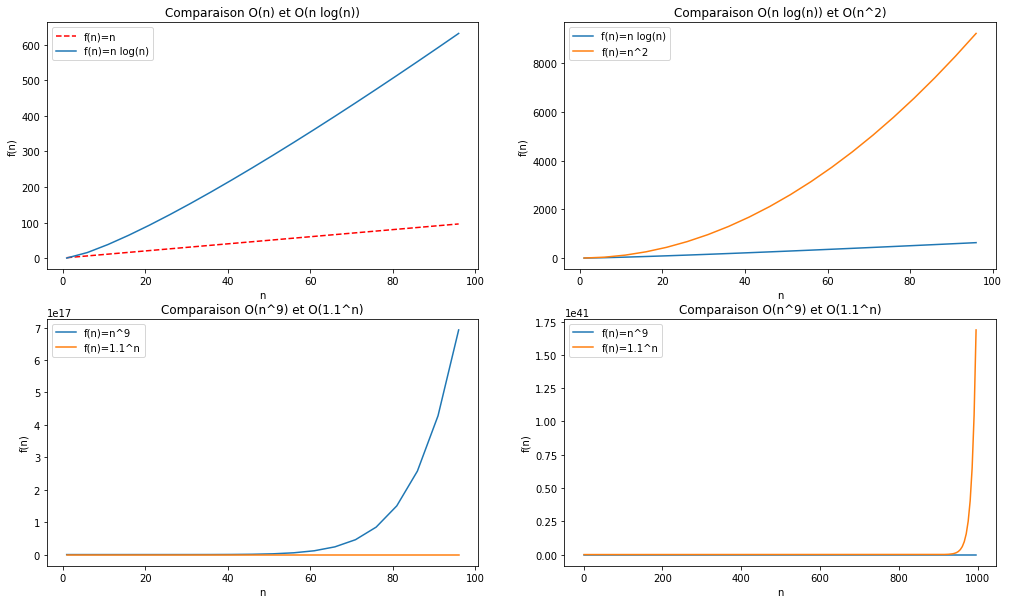

In [7]:
# Comparaison de plusieurs ordre de grandeur de complexité.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig1, axs1 = plt.subplots(2, 2, figsize=(17,10))

for i in range(2):
    for j in range(2):
        axs1[i,j].set_xlabel('n')
        axs1[i,j].set_ylabel('f(n)')

n = np.arange(1, 100, 5)
axs1[0,0].plot(n, n, 'r--', label = 'f(n)=n')
axs1[0,0].plot(n, n*np.log2(n), label = 'f(n)=n log(n)')
axs1[0,0].set_title('Comparaison O(n) et O(n log(n))')
axs1[0,0].legend()

axs1[0,1].plot(n, n*np.log2(n), label = 'f(n)=n log(n)')
axs1[0,1].plot(n, n**2, label = 'f(n)=n^2')
axs1[0,1].set_title('Comparaison O(n log(n)) et O(n^2)')
axs1[0,1].legend()

axs1[1,0].plot(n, n**9, label = 'f(n)=n^9')
axs1[1,0].plot(n, np.power(1.1,n), label = 'f(n)=1.1^n')
axs1[1,0].set_title('Comparaison O(n^9) et O(1.1^n)')
axs1[1,0].legend()

n = np.arange(1, 1000, 5)
axs1[1,1].plot(n, n**9, label = 'f(n)=n^9')
axs1[1,1].plot(n, np.power(1.1,n), label = 'f(n)=1.1^n')
axs1[1,1].set_title('Comparaison O(n^9) et O(1.1^n)')
axs1[1,1].legend()

plt.show()

On peut observer que l'utilisation de la notation $O$ capture bien des propriétés importantes en termes de complexité relative. Un algorithme de complexité en $O(n)$ est bien plus rapide, quand $n$ devient grand, qu'un algorithme de complexité en $O(n \log(n))$ : pour des données de taille $100$ il faudrait que la constante $C$ soit proche de $6$ pour qu'en pratique les deux algorithmes aient une complexité comparable.

La comparaison entre $O(n\log(n))$ et $O(n^2)$ est encore plus frappante. Ce cas particulier a des applications pratiques très importantes en génomique. En effet de nombreux algorithmes *exacts* de comparaison de séquences (supposons qu'on compare deux séquences de même longueur $n$) ont une complexité en $\Theta(n^2)$ (ce sont des algorithmes de programmation dynamique qui doivent remplir une table de $n^2$ cellules). Si on prend $n$ comme étant la taille d'un génome bactérien par exemple, $n \simeq 4000000$, une complexité quadratique, i.e. en $O(n^2)$ devient prohibitive. Ce problème a motivé le développement de plusieurs algorithmes permettant de quantifier *approximativement* la similarité de deux séquences en temps $O(n \log n)$, et ce sont ces algorithmes qui sont utilisés en pratique, bien que n'étant pas des algorithmes exacts.

Les deux derniers graphes illsutrent le fait qu'une complexité polynomiale ($O(n^p)$ pour un entier $p$ donné) est bien meilleure asymptotiquement qu'une complexité exponentielle (de la forme $O(a^n)$, $a > 1$) même si $a$ est proche de $1$ et $p$ est grand, comme dans notre exemple. 

**Terminologie.**
Si un algorithme a une complexité en temps en $O(\log(n))$, on dit qu'il est de complexité *logarithmique*.  
Si un algorithme a une complexité en temps en $O(n)$, on dit qu'il est de complexité *linéaire*.  
Si un algorithme a une complexité en temps en $O(n^2)$, on dit qu'il est de complexité *quadratique*.  
Si un algorithme a une complexité en temps en $O(n^3)$, on dit qu'il est de complexité *cubique*.  
Si un algorithme a une complexité en temps en $O(n\log(n))$, on dit qu'il est de complexité *sous-quadratique* ou *linéarithmique*.  
Si un algorithme a une complexité en temps en $O(n^p)$, on dit qu'il est de complexité *polynomiale*.  
Si un algorithme a une complexité en temps en $O(a^n)$, $a>1$, on dit qu'il est de complexité *exponentielle*.  

Généralement, on préfère utiliser des algorithmes de complexité polynomiale, et pour des données de grande taille, on préfère les algorithmes linéaires ou sous-quadratiques.

### Notes.

## 6. Le tri par insertion.

On va maintenant regarder un des tris étudiés hier, le tri par insertion, qui trie en place un tableau $T$ d'entiers.

In [4]:
def tri_Insertion(T):
    n = len(T)
    for i in range(1,n):
        j = i-1;
        x = T[i]
        while j>=0 and x<T[j]:
            T[j+1] = T[j]
            j -= 1
        T[j+1] = x

#### Une première analyse de complexité.

La fonction *tri_Insertion* est essentiellement structurée autour de deux boucles imbriquées. La boucle externe (boucle *for*) est exectuée $n$ fois. Elle comporte 
- deux affectations,  
- une boucle *while* qui sera effectuée au plus $n$ fois elle aussi et implique 
  - un test booléen, 
  - deux affectations de variables.
  
On peut donc affirmer que tout exécution de cette fonction sur un tableau de $n$ entiers effectuera au plus $1 + n*(2+(2+1)n) = 1+2n+3n^2$ opérations élémentaires. Cette fonction est un polynôme de degré $2$, ce qui permet d'énoncer que la complexité dans le pire des cas de cet algorithme de tri par insertion est en $O(n^2)$.

On peut remarquer que notre approche détaillant toutes les opérations élémentaires n'est pas nécessaire. On peut justifier l'énoncé d'une complexité dans le pire cas en $O(n^2)$ par le fait que l'algorithme est composé de deux boucles imbriquées, chacune itérant au plus $n$ fois, les autres opérations étant toutes des opérations de complexité constante (tests, lecture/affectation de variables). 

#### Une analyse raffinée.
On peut cependant objecter que notre analyse est trop grossière, car à l'itération $i$ de la boucle externe (boucle *for*), la boucle interne (boucle *while*) n'est exécutée qu'au plus $i$ fois; donc utiliser le fait qu'elle est exécutée au plus $n$ fois comme on l'a fait ci-dessus pourrait nous amener à surestimer la complexité dans le pire cas.

On peut donc être plus fin, et affirmer que la complexité dans le pire cas est donnée par le nombre d'itérations de la boucle *while* et que ce nombre est borné supérieurement par la somme $1+2+\cdots+n$, i.e. la somme des $n$ premiers entiers naturels.

Cependant, comme on l'a vu avec notre Exemple 2, 
$$\sum_{i=1}^n i = \frac{n(n+1)}{2} = \frac{n^2}{2}+\frac{n}{2} \in O(n^2).$$
Donc cette analyse, bien que plus fine, ne modifie pas la complexité asymptotique dans le pire des cas de l'algorithme de tri par insertion.

#### Encore un raffinement.
On peut finalement être un peu plus précis, en remarquant que si le tableau $T$ est un tableau dont les éléments sont triés en ordre décroissant, alors pour l'itération $i$ de la boucle externe, on exécutera la boucle *while* exactement $i$ fois. On a donc une entrée pour laquelle l'algorithme a une complexité en temps en $\Theta(n^2)$, ce qui prouve que la complexité dans le pire cas du tri par insertion est en $\Theta(n^2)$.

De manière générale, si on peut prouver qu'un algorithme $A$ a une complexité dans le pire cas en $O(f(n))$ et que l'on peut exhiber une entrée spécifique $D$ de taille $n$ telle que $c(A,D) \in \Theta(f(n))$ alors on peut en déduire que l'algorithme $A$ a une complexité dans le pire cas en $\Theta(f(n))$.

#### Exercice.
Montrer que si $E_n$ est l'ensemble des *permutations* de l'ensemble $\{1,2,\dots,n\}$ alors la complexité en *moyenne* du tri par insertion est en $\Theta(n^2)$.

### Notes.

## 7. Le tri bulle.

Le principe du tri bulle est de trier le tableau passé en entrée en échangeant les éléments successifs tels que le premier est plus grand que le second. Ce principe général peut être implémenté de plusieurs facons, et le choix de l'implémentation a un impact sur la complexité et son analyse.

#### Une première implémentation.

On regarde d'abord une implémentation basée sur l'utilisation de boucles *for*.

In [5]:
def tri_Bulle_v1(T):
    n = len(T)
    for i in range(n-1,0,-1):
        for j in range(i):
            if T[j]>T[j+1]:
                aux    = T[j]
                T[j]   = T[j+1]
                T[j+1] = aux

L'analyse de complexité du tri bulle est quasi-similaire à celle du tri par insertion, plus facile même. L'algorithme se compose de deux boucles *for* imbriquées; la boucle externe est effectuée $n$ fois, la boucle interne $i$ fois ou $i$ est l'indice de la boucle externe. Donc le nombre total d'exécution des trois affectations de la boucle interne est
$$\sum_{i=1}^n i$$
qui est en $\Theta(n^2)$ comme on l'a vu dans le tri par insertion.

De plus, ce raisonnement s'applique à toutes les entrées de taille $n$, et on peut donc énoncer que la complexité dans le meilleur cas, dans le pire cas et en moyenne sont toutes les trois en $\Theta(n^2)$.

Le résultat ci-dessus devrait mener à la remarque suivante : le fait que cet algorithme effectue $\Theta(n^2)$ opérations pour un tableau déjà n'est-il pas un problème ? On peut alors penser à une implémentation différente du principe du tri bulle.

#### Une seconde implémentation

On va maintenant remplacer la boucle *for* externe par une boucle *while* itérée tant que le tableau n'est pas trié. Comme cela, si il est trié au départ, on s'en apercoit vite et l'algorithme stoppe vite.

In [6]:
def tri_Bulle_v2(T):
    n = len(T)
    trie = False
    while not trie:
        trie = True
        for j in range(n-1):
            if T[j]>T[j+1]:
                aux    = T[j]
                T[j]   = T[j+1]
                T[j+1] = aux
                trie = False

L'analyse de cet algorithme est cependant plus délicate. 

Si le tableau $T$ est trié, lors de la première exécution de la boucle externe, on ne trouve jamais d'indice $j$ tel que $T[j]>T[j+1]$, dont le booléen $trie$ a la valeur $True$ à la fin de la boucle *while* qui est donc exécutée une seule fois. On a donc bien une complexité dans le meilleur des cas en $\Theta(n)$.

Regardons maintenant la complexité dans le pire des cas. On observe toujours une structure de deux boucles imbriquées. La boucle interne est effectuée au plus $n$ fois par itération de la boucle externe. Mais la boucle externe n'est pas une boucle *for* et on n'a pas d'information *a priori* sur le nombre d'itérations de cette boucle : elle est répétée tant que le tableau $T$ n'est pas trié. 

D'un point de vue théorique se pose même la question de terminaison de l'algorithme : est-on certains que la boucle externe n'est pas effectuée un nombre infini de fois? L'analyse de complexité de cet algorithme demande donc d'aller au delà d'une simple analyse de la structure de l'algorithme, et d'en comprendre une propriété logique fondamentale, appelée un *invariant*.

**Propriété.** Après $k$ itérations de la boucle externe, les $k$ dernières cellules du tableau $T$ contiennent les $k$ plus grands éléments, triés en ordre croissant.

Cet invariant n'est pas bien difficile à prouver (Exercice) et on en déduit immédiatement une propriété importante en termes de complexité.

**Propriété.** La boucle externe de l'algorithme *tri_Bulle_v2* est itérée au plus $n$ fois.

On peut donc en déduire que l'algorithme se compose d'une boucle externe itérée au plus $n$ fois et d'une boucle interne itérée au plus $n$ fois pour chaque itération de la boucle externe, ce qui donne une complexité dans le pire cas en $O(n^2)$. On ne peut pas directement affirmer que cette complexité est en $\Theta(n^2)$ car notre analyse ne repose que sur une borne supérieure sur le nombre d'itérations de la boucle externe.

Si on veut prouver que la complexité dans le pire cas est en fait en $\Theta(n^2)$, on doit exhiber un tableau $T$ dont le tri demande $\Theta(n)$ itérations de la boucle externe, donc une complexité en $\Theta(n^2)$. Il n'est pas difficile de montrer qu'une telle entrée est le tableau $T = n\ n-1\ n-2\ \cdots 2\ 1$.

#### Conclusion.
On vient de voir un cas pour lequel un principe algorithmique simple peut être implémenté de plusieurs facons différentes. L'analyse de la complexité dans le meilleur des cas est utile pour observer que l'implémentation simple souffre d'un défaut important, avec cependant l'avantage d'être facile à analyser. L'analyse de limplémentation qui se comporte bien pour un tableau trié demande de comprendre un invariant, et est donc plus difficile.

### Notes.

## 8. Tri fusion.

On va terminer par l'analyse du tri par fusion, qui est un algorithme récursif et demande donc de résoudre une récurrence. Pour faciliter l'analyse de complexité, on suppose que $n=2^p$ pour un entier $p$ donné : $m=\log(n)$.

In [7]:
# Fusionner deux sous-tableaux T[g..m] et T[m+1..d]
def fusionner(T,g,m,d):
    R = [0]*(d-g+1)
    i = g
    j = m+1
    k = 0
    while i<=m and j<=d:
        if T [i]<=T[j]:
            R[k] = T[i]
            i += 1
        else:
            R[k] = T[j]
            j += 1
        k += 1
    while i<=m:
        R[k] = T[i]
        i += 1
        k += 1
    while j<=d:
        R[k] = T[j]
        j += 1
        k += 1
    for k in range(len(R)):
        T[g+k] = R[k]
        
def tri_Fusion_Rec(T,g,d):
    if g<d:
        m = (g+d)//2
        nb_etapes += tri_Fusion_Rec(T,g,m)
        nb_etapes += tri_Fusion_Rec(T,m+1,d)
        nb_etapes += fusionner(T,g,m,d)

def tri_Fusion(T):
    n = len(T)
    return(tri_Fusion_Rec(T,0,n-1))

#### Fonction *fusionner*.

Pour faire l'analyse de la complexité dans le pire des cas, on regarde d'abord la fonction *fusionner*. Elle travaille sur un sous-tableau $T[g..d]$ et se compose de 4 boucles successives. Il est immédiat de voir que chaque boucle effectue un nombre d'opérations qui est en $O(d-g+1)$ ou $d$ et $g$ sont respectivement les indices de début et de fin du sous-tableau considéré. 

On peut donc affirmer que toute exécution de *fusionner* sur un sous-tableau de taille $q$ effectue un nombre d'opération en $O(q)$.

#### Algorithme complet.

On regarde maintenant l'algorithme *tri_Fusion*. Il se content d'appeler l'algorithme récursif *tri_Fusion_Rec*, et chaque exécution de cette fonction effectue deux appels récursif à *tri_Fusion_Rec* et un appel à *fusionner*.

Si on note $A(n)$ le nombre maximum d'opérations de cet algorithme il satisfait la propriété suivante : 
$$A(n) \in \Theta(B(n)),\ B(n) = 2*B(n/2) + n\ (n>1),\ B(1)=1.$$

Il nous reste donc à résoudre la récurrence
$$B(n) = 2*B(n/2) + n\ (n>1),\ B(1)=1.$$

Le Théorème Maitre qu'on verra plus tard permet de la résoudre :
$$B(n) \in \Theta(n\log(n))$$
et on en déduit que la complexité dans le pire cas de l'algorithme de tri par fusion est en $\Theta(n\log(n))$.

#### Remarque.
Même sans appliquer le Théorème Maitre on peut prouver assez facilement par induction que $B(n) \in \Theta(n\log(n))$.

En effet, si on fait l'hypothèse que  $B(n) \in \Theta(n\log(n))$  alors, la récurrence
$$B(n) = 2*B(n/2) + n$$
implique que 
$$B(n) \in \Theta(2(n/2)\log(n/2)+n)$$
donc
$$B(n) \in \Theta(n(\log(n/2)+1))$$
$$B(n) \in \Theta(n(\log(n/2)+\log(2)))$$
$$B(n) \in \Theta(n\log(n)).$$
Il suffisait donc juste de "deviner" que $B(n) \in \Theta(n\log(n))$.

Pour deviner que $B(n) \in \Theta(n\log(n))$ on peut observer un *arbre d'exécution* sur un petit tableau

![https://openclassrooms.com/fr/courses/1467201-algorithmique-pour-lapprenti-programmeur/1467940-introduction-au-probleme-du-tri](tri-fusion.png)

Et on peut observer que
- l'ensemble des appels récursifs sur des sous-tableaux de même taille (qui est une puissance de $2$) concerne des sous-tableaux dont la somme des tailles vaut exactement $n$,
- le nombre de tailles différentes de sous-tableaux est $\log(n)$ ($2^p, 2^{p-1}, 2^{p-2}, \dots, 2,1$).

#### Exercice.
Justifier la propriété  $A(n) \in \Theta(B(n)),\ B(n) = 2*B(n/2) + n\ (n>1),\ B(1)=1$.


#### Exercice. 
Prouver que la complexité en moyenne de l'algorithme de tri par fusion est en $\Theta(n\log(n))$

### Notes.

## 9. Recherche de l'élément majoritaire dans un tableau

On termine par le problème algorithmique suivant : étant donné un tableau $T$ de $n$ entiers positifs, décider si il contient un élément apparaissant plus de $n/2$ fois. Pour simplifier, on suppose que $n=2^p$.

### 9.1. Algorithme naif.

Cet algorithme calcule pour chaque élément de $T$ son nombre d'occurrences.

In [8]:
# Retourne le nombre d'occurrences de x dans T[g..d]
def occurrences(T,x,g,d):
    compteur = 0
    for i in range(g,d+1):
        if T[i] == x:
            compteur += 1
    return(compteur)

def element_Majoritaire_v1(T):
    n = len(T)
    for i in range(int(n/2)):
        if occurrences(T,T[i],i,n-1)>n/2:
            return(True)
    return(False)

L'analyse de complexité de cet algorithme est simple. La fonction *occurrences* a une complexité (pire cas, meilleur cas, moyenne) en $\Theta(d-g+1)$. Elle est appelée $n/2 \in \Theta(n)$ fois, donc la complexité totale de l'algorithme est en $\Theta(n^2)$.

### 9.2. Un algorithme récursif

Le principe de cet algorithme est simple. On découpe le tableau en deux parts de même taille et on recherche un possible élément majoritaire dans chaque sous-tableau. Si on trouve un élément majoritaire dans un sous-tableau on calcule son nombre d'occurrences dans tout le tableau et si il est majoritaire, on a trouvé un élément majoritaire dans le tableau.

In [9]:
def element_Majoritaire_Rec(T,g,d):
    if g==d:
        return((True,T[g]))
    
    (b_1,e_1) = element_Majoritaire_Rec(T,g,int((g+d-1)/2))
    (b_2,e_2) = element_Majoritaire_Rec(T,int((g+d+1)/2),d)
    
    if b_1==True:
        c_1 = occurrences(T,e_1,g,d)
    else:
        c_1 = 0
    if b_2==True:
        c_2 = occurrences(T,e_2,g,d)
    else:
        c_2 = 0
    
    if b_1==True and c_1>(d-g+1)/2:
        return((True,e_1))
    elif b_2==True and c_2>(d-g+1)/2:
        return((True,e_2))
    else:
        return((False,0))
        
def element_Majoritaire_v2(T):
    n = len(T)
    (trouve,element) = element_Majoritaire_Rec(T,0,n-1)
    return((trouve,element))

Pour analyser la complexité de cet algorithme récursif, on peut observer qu'il a une structure similaire au tri par fusion : la fonction récursive est appelée sur deux sous-tableaux de taille $n/2$ et ces deux appels sont suivis d'un traitement en $\Theta(n)$ (essentiellement les deux appels à *occurrences*). On peut donc utiliser tel quel le raisonnement utilisé pour le tri par fusion, et on a donc une complexité dans le pire des cas (et en moyenne aussi) en $\Theta(n\log(n))$.

### 9.3. Un algorithme récursif amélioré

Pour le problème de l'élément majoritaire on aimerait quand même avoir un algorithme de complexité linéaire (i.e. en $\Theta(n))$). On peut améliorer l'algorithme précédent pour arriver à ce résultat.

L'idée est de travailler en deux phases :
- dans un premier temps, on détecte un candidat élément majoritaire, ou on détecte qu'il n'y en n'a pas,
- si on a détecté un candidat on compte son nombre d'occurrences pour vérifier si il est majoritaire. 

Le point important est de ne pas appeler *occurrences* plusieurs fois.

Il faut donc définir ce qu'est un candidat : il s'agit d'un élément $x$ du tableau appraissant au plus $p$ fois ($p > n/2$) alors que tout autre élément apparait au plus $n-p$ fois (donc moins de $n/2$ fois).

In [10]:
def element_Majoritaire_Candidat_Rec(T,g,d):
    if g==d:
        return((True,T[g],1))
        
    (b_1,e_1,p_1) = element_Majoritaire_Candidat_Rec(T,g,int((g+d-1)/2))
    (b_2,e_2,p_2) = element_Majoritaire_Candidat_Rec(T,int((g+d+1)/2),d)
    
    n = d-g+1
    if b_1==False and b_2==False:
        return((False,0,0))
    elif b_1==False and b_2==True:
        return((True,e_2,p_2+n/4))
    elif b_1==True and b_2==False:
        return((True,e_1,p_1+n/4))
    else:
        if e_1!=e_2:
            if p_1>p_2:
                return((True,e_1,p_1+n/2-p_2))
            elif p_2>p_1:
                return((True,e_2,p_2+n/2-p_1))
            else:
                return((False,0,0))
        else:
            return((True,e_1,p_1+p_2))
        
def element_Majoritaire_v3(T):
    n = len(T)
    (trouve_candidat,candidat,p) = element_Majoritaire_Candidat_Rec(T,0,n-1)
    compteur_candidat = occurrences(T,candidat,0,n-1)
    if compteur_candidat>n/2:
        return(True)
    else:
        return(False)

Pour analyser la complexité de cet algorithme récursif, on adapte le raisonnement utilisé pour le tri par fusion.

La fonction *element_Majoritaire_Candidat_Rec* se compose de deux appels récursifs sur des sous-tableaux de taille la moitié de la taille du tableau passé en entrée suivi d'un nombre constant d'opérations. La complexité dans le pire des cas $A(n)$ satisfait donc la propriété
$$A(n) \in \Theta(B(n)),\ B(n) = 2*B(n/2) + 1\ (n>1),\ B(1)=1.$$

Résoudre la récurrence
$$B(n) = 2*B(n/2) + 1\ (n>1),\ B(1)=1$$
donne
$$B(n) \in \Theta(n).$$

En effet, on a un appel à *element_Majoritaire_Candidat_Rec* sur un tableau de taille $n$, deux appels sur des sous-tableaux de taille $n/2$, quatre appels sur des sous-tableaux de taille $n/4$ etc. Si on suppose que $n=2^p$, le nombre total d'appels à *element_Majoritaire_Candidat_Rec* est donc
$$\sum_{q=0}^p 2^q = 2^{p+1}-1\in \Theta(2^p).$$

Donc l'instruction *element_Majoritaire_Candidat_Rec(T,0,n-1)* a une complexité dans le pire cas (en moyenne et dans le meilleur cas aussi) en $\Theta(n)$. Elle est suivie d'un unique appel à *occurrences*, d'une complexité en $\Theta(n)$.

La complexité totale (pire cas, meilleur cas, en moyenne) de l'algorithme est donc en $\Theta(n)$.

### Notes.

## Conclusion.

Voici un résumé des éléments importants survolés durant ce cours.
- La complexité en temps mesure le temps d'exécution abstrait d'un algorithme en termes de nombre d'opérations élémentaires.
- Cette complexité peut se décliner sous trois formes : meilleur cas, pire cas, moyenne.
- On ne s'intéresse pas au nombre exact d'opérations élémentaires, mais à son ordre de grandeur, via les notations $O(.)$ et $\Theta(.)$.
- La complexité d'un algorithme itératif s'obtient en général par l'analyse de sa structure et notamment des structures de controle (boucles).
- La complexité d'un algorithme récursif s'obtient via la résolution de récurrences.